In [92]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [12]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


C:\Users\JoseLuisFernandez\miniconda3\envs\py38\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Los datos los hemos extraído de https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations

In [13]:
diagnostic = pd.read_csv('urinary_inflammation.csv', sep = ';')
diagnostic.head()

,temperature,occurrence_of_nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,nephritis_of_renal_pelvis_origin,inflammation_of_urinary_bladder
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,no,yes
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,no,yes
4,36.0,no,yes,no,no,no,no,no


Vamos a cambiar las variables bivalentes por enteros: yes=1 y no=0

In [14]:
diagnostic = diagnostic.replace(to_replace = ['yes','no'],value = ['1','0'])
diagnostic.head()

,temperature,occurrence_of_nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,nephritis_of_renal_pelvis_origin,inflammation_of_urinary_bladder
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,0,1
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,0,1
4,36.0,0,1,0,0,0,0,0


Renombramos las columnas para facilitar el trabajo con las variables:

* a1: temperatura del paciente
* a2: ocurrencia de nauseas
* a3: dolor lumbar
* a4: necesidad continua de orinar
* a5: dolores miccionales
* a6: ardor de la uretra, picazón o hinchazón de la salida de la uretra

Las enfermedades que se desean evaluar son:

* d1: inflamación de la vejiga urinaria
* d2: nefritis de origen en la pelvis renal

In [15]:
diagnostic.columns

Index(['temperature', ' occurrence_of_nausea', ' lumbar_pain',
       ' urine_pushing', ' micturition_pains', ' burning_of_urethra',
       ' nephritis_of_renal_pelvis_origin',
       ' inflammation_of_urinary_bladder'],
      dtype='object')

In [16]:
diagnostic = diagnostic.rename({'temperature': 'a1', ' occurrence_of_nausea': 'a2', ' lumbar_pain':'a3', ' urine_pushing':'a4',
                               ' micturition_pains': 'a5', ' burning_of_urethra': 'a6', 
                                ' nephritis_of_renal_pelvis_origin':'d2',' inflammation_of_urinary_bladder':'d1'}, axis=1)
diagnostic.head()

,a1,a2,a3,a4,a5,a6,d2,d1
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,0,1
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,0,1
4,36.0,0,1,0,0,0,0,0


Se ha de separar las variables objetivo y las características disponibles para la creación del modelo. En este el enunciado dice que hay dos variables objetivo `d1` y `d2`.

In [17]:
diagnostic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      120 non-null    float64
 1   a2      120 non-null    object 
 2   a3      120 non-null    object 
 3   a4      120 non-null    object 
 4   a5      120 non-null    object 
 5   a6      120 non-null    object 
 6   d2      120 non-null    object 
 7   d1      120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


Vemos que el tipo de las variables es recomendable homogeneizarlo y ponerlo en formato de enteros

In [18]:
diagnostic = diagnostic.apply(pd.to_numeric)

In [19]:
diagnostic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      120 non-null    float64
 1   a2      120 non-null    int64  
 2   a3      120 non-null    int64  
 3   a4      120 non-null    int64  
 4   a5      120 non-null    int64  
 5   a6      120 non-null    int64  
 6   d2      120 non-null    int64  
 7   d1      120 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 7.6 KB


In [20]:
target_1 = 'd1'
target_2 = 'd2'
features = list(diagnostic.columns)
features.remove('d1')
features.remove('d2')

In [21]:
diagnostic.describe()

,a1,a2,a3,a4,a5,a6,d2,d1
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,38.724167,0.241667,0.583333,0.666667,0.491667,0.416667,0.416667,0.491667
std,1.819132,0.429888,0.495074,0.473381,0.502027,0.495074,0.495074,0.502027
min,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.950000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,40.600000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Intento comprobar en una primera aproximación la forma de los datos mediante el histograma de las distintas variables.

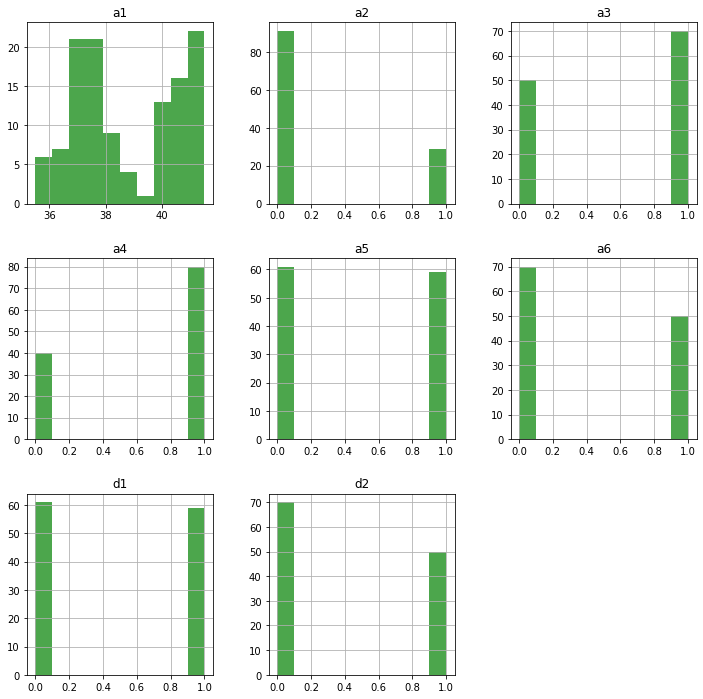

In [27]:
diagnostic.hist(figsize = (12, 12), color='g', alpha= 0.7);

Observamos la colinealidad de las variables: No parece que exista correlación entre las variables que podamos eliminar

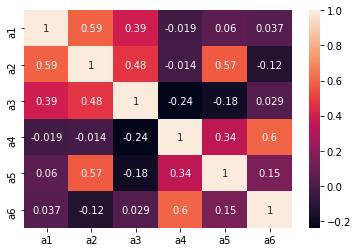

In [35]:
from seaborn import heatmap
heatmap(diagnostic[features].corr(), annot = True);

### Selección de características
Una vez importados los datos se han de seleccionar las características más adecuadas para el modelo.  

#### Análisis de relevancia de atributos en Python - IV y WoE  
Referencia: https://towardsdatascience.com/attribute-relevance-analysis-in-python-iv-and-woe-b5651443fc04  

La fase de análisis de relevancia de atributos tiene la tarea de reconocer atributos (características) con mayor impacto en la predicción de la variable/s objetivo. Se basa en dos términos: **Valor de la Información** (IV - Information Value) y **Peso de la evidencia** (WoE - Weith of Evidence).  

**WoE** = El peso de la evidencia indica el poder predictivo de una variable independiente en relación con la variable dependiente. Se usa para las variables continuas o las variables ficcticias distribuidas en contenedores deribadas de ellas.  
**IV** = El valor de la información sirve para seleccionar variables importantes en un modelo predictivo. Ayuda a clasificar las variables en función de su importancia. Se usan para las variables categóricas, normalmente dummies.

![WoE y IV Formulas](images/WoE_IV_formulas.png)

#### Prerequisitos de los datos para calcular correctamente IV y WoE  
- El conjunto de datos debe **estar limpio**. Los datos faltantes deben tener la etiqueta correspondiente "Nan" o "Faltante"
- No debe haber **ningún atributo continuo**. Los atributos continuos deben agruparse en 5 a 10 contenedores. Solo asegúrese de que cada contenedor tenga al menos el 5% de las observaciones.  

In [34]:
#Función del Valor de la Información
def calculateIV(data, features, target):
    result = pd.DataFrame(index = ['IV'], columns = features)
    result = result.fillna(0)
    var_target = array(data[target])
    
    for cat in features:
        var_values = array(data[cat])
        var_levels = unique(var_values)

        mat_values = numpy.zeros(shape=(len(var_levels),2))
        
        for i in range(len(var_target)):
            for j in range(len(var_levels)):
                if var_levels[j] == var_values[i]:
                    pos = j
                    break

            # Estimación del número valores en cada nivel
            if var_target[i]:
                mat_values[pos][0] += 1
            else:
                mat_values[pos][1] += 1

            # Obtención del IV
            IV = 0
            for j in range(len(var_levels)):
                if mat_values[j][0] > 0 and mat_values[j][1] > 0:
                    rt = mat_values[j][0] / (mat_values[j][0] + mat_values[j][1])
                    rf = mat_values[j][1] / (mat_values[j][0] + mat_values[j][1])
                    IV += (rt - rf) * np.log(rt / rf)
                    
        # Se agrega el IV al listado
        result[cat] = IV
        
    return result

In [58]:
def get_WoE(data, var, target):
    crosstab = pd.crosstab(data[target], data[var])
    
    print("Obteniendo el Woe para la variable", var, ":")
    
    for col in crosstab.columns:
        if crosstab[col][1] == 0:
            print("  El WoE para", col, "[", sum(crosstab[col]), "] es infinito")
        else:
            print("  El WoE para", col, "[", sum(crosstab[col]), "] es", np.log(float(crosstab[col][0]) / float(crosstab[col][1])))

In [27]:
#Valores Faltantes
diagnostic.isnull().sum()

a1    0
a2    0
a3    0
a4    0
a5    0
a6    0
d2    0
d1    0
dtype: int64

Se cumple el primer punto al no existir valores faltantes

Para el segundo requisito vamos a diferenciar las continuas (a1) de las variables categóricas (resto).

In [74]:
continuous = ['a1']

categorical_1 = features[:]
categorical_1.remove('a1')
categorical_2 = categorical_1[:] #Es una copia para valorar sobre la target_2

Cálculamos IV para la **primera variable objetivo (target_1)**:

In [75]:
calculateIV(diagnostic, categorical_1, target_1)

,a2,a3,a4,a5,a6
IV,0.228563,1.283153,0.490682,2.145575,0.092741


Interpretamos los valores obtenidos de la IV: Por debajo de 0.1 puede ser un mal predictor.  
Por tanto podemos eliminar la variable a6

In [76]:
categorical_1.remove('a6')

Cálculamos IV para la **segunda variable objetivo (target_2)**:

In [77]:
calculateIV(diagnostic, categorical_2, target_2)

,a2,a3,a4,a5,a6
IV,0.648293,0.392696,0.549306,0.201276,0.473789


En este caso ninguna de las variables está por debajo de 0.1 por lo que las consideramos buenas predictoras. Los valores de IV se pueden considerar promedio o superior. 

#### Análisis de la variable continua

Analizamos la variable a1 de la temperatura. Se puede analizar si esta se puede discretizar o se puede introducir directamente en cada uno de los modelo.

Text(0.5, 1.0, "['a1']")

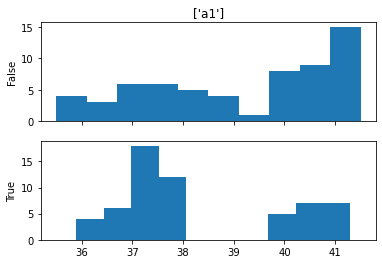

In [47]:
f, axarr = plt.subplots(2, sharex = True)

axarr[0].hist(double(diagnostic[continuous][diagnostic[target_1]==0]))
axarr[1].hist(double(diagnostic[continuous][diagnostic[target_1]==1]))

axarr[0].set_ylabel('False')
axarr[1].set_ylabel('True')
axarr[0].set_title(continuous)

En este caso se puede ver que la predicción depende de forma no lineal con la temperatura. Por lo menos existen 4 categorías: hasta 37, de 37 a 38, de 38 a 40 y más de 40.

#### target_1

Discretización por método automático

In [55]:
diagnostic['a1_g1'] = pd.qcut(diagnostic['a1'], 4, labels=['n0', 'n1', 'n2', 'n3'])

In [60]:
#Calculamos para esta variable WoE y IV para la primera variable objetivo (target_1)
get_WoE(diagnostic, 'a1_g1', target_1)
calculateIV(diagnostic, ['a1_g1'], target_1)

Obteniendo el Woe para la variable a1_g1 :
  El WoE para n0 [ 31 ] es -0.4595323293784402
  El WoE para n1 [ 29 ] es -0.9650808960435872
  El WoE para n2 [ 32 ] es 0.7884573603642703
  El WoE para n3 [ 28 ] es 0.7472144018302211


,a1_g1
IV,1.098922


Discretización por método dirigido

In [152]:
#O podemos discretizar de forma dirigida
diagnostic.loc[:, 'a1_g1_b'] = diagnostic['a1'].map(lambda x: 'n0' if x < 37 else 'n1' if x < 38 else 'n2' if x < 40 else 'n3')

In [153]:
get_WoE(diagnostic, 'a1_g1_b', target_1)
calculateIV(diagnostic, ['a1_g1_b'], target_1)

Obteniendo el Woe para la variable a1_g1_b :
  El WoE para n0 [ 20 ] es 0.0
  El WoE para n1 [ 40 ] es -1.0986122886681098
  El WoE para n2 [ 10 ] es infinito
  El WoE para n3 [ 50 ] es 0.4895482253187058


,a1_g1_b
IV,0.666798


Parece que es más idoneo los resultados con el método dirigido, dándonos un IV más ajustado. IV por encima de 1 puede ser demasiado bueno para ser verdad.

#### target_2

Text(0.5, 1.0, "['a1']")

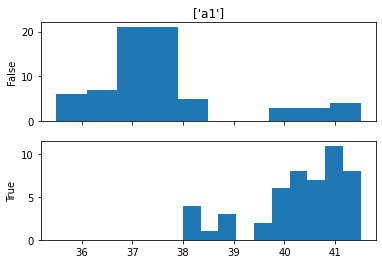

In [64]:
f, axarr = plt.subplots(2, sharex = True)

axarr[0].hist(double(diagnostic[continuous][diagnostic[target_2]==0]))
axarr[1].hist(double(diagnostic[continuous][diagnostic[target_2]==1]))

axarr[0].set_ylabel('False')
axarr[1].set_ylabel('True')
axarr[0].set_title(continuous)

Discretización con método automático

In [143]:
diagnostic['a1_g2'] = pd.qcut(diagnostic['a1'], 2, labels=['n0', 'n1'])

In [144]:
get_WoE(diagnostic, 'a1_g2', target_2)
calculateIV(diagnostic, ['a1_g2'], target_2)

Obteniendo el Woe para la variable a1_g2 :
  El WoE para n0 [ 60 ] es infinito
  El WoE para n1 [ 60 ] es -1.6094379124341003


,a1_g2
IV,1.072959


In [145]:
get_WoE(diagnostic, 'a1_g2', target_1)
calculateIV(diagnostic, ['a1_g2'], target_1)

Obteniendo el Woe para la variable a1_g2 :
  El WoE para n0 [ 60 ] es -0.6931471805599453
  El WoE para n1 [ 60 ] es 0.7691330875378674


,a1_g2
IV,0.513065


Parece que la variable ficticia que hemos generado a1_g2 puede predecir para ambas variables objetivo. Aunque parece mejor predictor para target_2

Discretización con método dirigido

In [68]:
#Podemos discrtizar de manera más dirigida para comprobar si mejoran los resultados
diagnostic.loc[:, 'a1_g2_b'] = diagnostic['a1'].map(lambda x: 'n0' if x < 39 else 'n1')
get_WoE(diagnostic, 'a1_g2_b', target_2)
calculateIV(diagnostic, ['a1_g2_b'], target_2)

Obteniendo el Woe para la variable a1_g2_b :
  El WoE para n0 [ 67 ] es 2.1484344131667874
  El WoE para n1 [ 53 ] es -1.4586150226995167


,a1_g2_b
IV,2.607702


In [69]:
get_WoE(diagnostic, 'a1_g2_b', target_1)
calculateIV(diagnostic, ['a1_g2_b'], target_1)

Obteniendo el Woe para la variable a1_g2_b :
  El WoE para n0 [ 67 ] es -0.3930425881096072
  El WoE para n1 [ 53 ] es 0.581921545449721


,a1_g2_b
IV,0.240957


Esta última forma de discretizar, es mejor predictor para la target_1 y malo para la target_2. En este caso quizás sería mejor utilizar la primera forma de contenedores que hemos generado con la función pd.qcut para la target_2.  

Como conclusión, elegimos:
- a1_g1_b para el target 1
- a1_g2 para el target 2


In [150]:
diagnostic['a1_g1_b']

0      n0
1      n0
2      n0
3      n0
4      n0
       ..
115    n3
116    n3
117    n3
118    n3
119    n3
Name: a1_g1_b, Length: 120, dtype: object

In [151]:
diagnostic['a1_g1']

0      n0
1      n0
2      n0
3      n0
4      n0
       ..
115    n3
116    n3
117    n3
118    n3
119    n3
Name: a1_g1, Length: 120, dtype: category
Categories (4, object): [n0 < n1 < n2 < n3]

### Creación del modelo predictivo

En primer lugar se crean dos conjuntos de datos para cada una de las variables objetivo o independiente, añadiendo las variables ficticias seleccionadas anteriormente y convertidas a variables dummies para poder generar dos modelos mejor ajustados.

In [154]:
data_model_1 = pd.concat([diagnostic[categorical_1], pd.get_dummies(diagnostic['a1_g1_b'], prefix = 'pclass')], axis = 1)
data_model_2 = pd.concat([diagnostic[categorical_2], pd.get_dummies(diagnostic['a1_g2'], prefix = 'pclass')], axis = 1)

#### Detección de multicolinealidad en las variables

Las variables colineales se pueden eliminar mediante la utilización del Factor de inflación de la varianza (VIF).  
Referencia: https://www.analyticslane.com/2020/04/22/solucionar-la-multicolinealidad-con-vif/

In [147]:
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning) 

def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result

def selectDataUsingVIF(data, max_VIF = 5):
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.to_numpy().max() > max_VIF: #Cambio de as_matrix() por values.
        col_max = np.where(VIF == VIF.to_numpy().max())[1][0] #Cambio de as_matrix() por values.
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

#### Modelo 1 para la primera variable objetivo (target_1)

In [157]:
calculateVIF(data_model_1)

,a2,a3,a4,a5,pclass_n0,pclass_n1,pclass_n2,pclass_n3
VIF,6.146789,1.338202,0.914,3.787419,inf,inf,inf,inf


In [160]:
model_1 = selectDataUsingVIF(data_model_1)
calculateVIF(model_1)

,a3,a4,a5,pclass_n1,pclass_n2,pclass_n3
VIF,1.558263,1.446684,1.387177,2.136578,1.871053,2.222875


#### Modelo 2 para la segunda variable objetivo (target_2)

In [161]:
calculateVIF(data_model_2)

,a2,a3,a4,a5,a6,pclass_n0,pclass_n1
VIF,7.799021,2.809522,1.898356,4.857637,2.557008,inf,inf


In [162]:
model_2 = selectDataUsingVIF(data_model_2)
calculateVIF(model_2)

,a3,a4,a5,a6,pclass_n1
VIF,1.502873,1.878122,1.15266,1.661995,1.397528


#### Separación de las variables en conjunto de muestra y validación
Para validar los resultados se ha de crear un conjunto de entrenamiento y otro de validación. Este proceso se ha de realizar para cada una de las variables objetivo, para lo cual se puede utilizar la función `train_test_split`.

In [163]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(model_1, diagnostic[target_1], random_state = 100)
x2_train, x2_test, y2_train, y2_test = train_test_split(model_2, diagnostic[target_2], random_state = 100)

#### Creación y validación de los modelos 

Se trata de un problema de Clasificación binaria por lo que utilizamos un modelos de Regresión logistica.  
Creamos primero las funciones con las métricas necesarias para evaluar los modelos.

In [164]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print("La matriz de confusión es ")
    print(confusion_matrix)

    print('Precisión:', accuracy_score(y_true, y_pred))
    print('Exactitud:', precision_score(y_true, y_pred))
    print('Exhaustividad:', recall_score(y_true, y_pred))
    print('F1:', f1_score(y_true, y_pred))

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print('AUC:', auc(false_positive_rate, recall))

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)

#### Modelo para la primera variable objetivo target_1

La matriz de confusión es 
[[45  0]
 [ 0 45]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


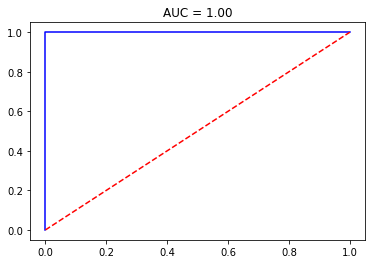

In [165]:
from sklearn.linear_model.logistic import LogisticRegression

model = LogisticRegression().fit(x1_train, y1_train)
y1_pred_train = model.predict(x1_train)
y1_pred_test = model.predict(x1_test)

metricas_modelos(y1_train, y1_pred_train);

Comprobamos si existe sobreajuste con el conjunto de validación

La matriz de confusión es 
[[16  0]
 [ 0 14]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


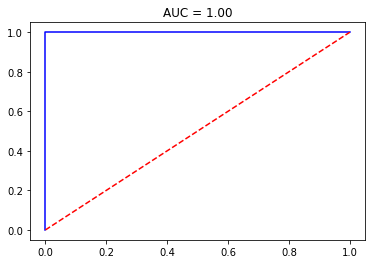

In [166]:
metricas_modelos(y1_test, y1_pred_test)

No parece que exista sobreajuste, pero es demasiado perfecto para no tener dudas, asique intentaremos más adelante una validación cruzada para asegurarnos del buen rendimiento del modelo.  
Por ahora hacemos el modelo para la segunda variable objetivo.

#### Modelo para la segunda variable objetivo target_2

La matriz de confusión es 
[[50  0]
 [ 0 40]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


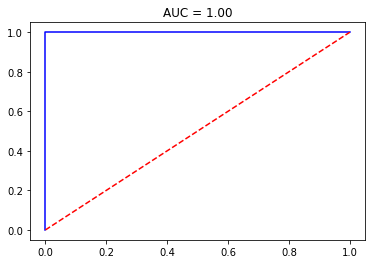

In [167]:
model = LogisticRegression().fit(x2_train, y2_train)
y2_pred_train = model.predict(x2_train)
y2_pred_test = model.predict(x2_test)

metricas_modelos(y2_train, y2_pred_train);

La matriz de confusión es 
[[20  0]
 [ 0 10]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


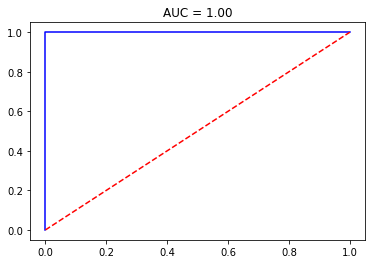

In [168]:
metricas_modelos(y2_test, y2_pred_test)

Con esta segunda variable objetivo ocurre lo mismo que con la primera. No parece que exista sobreajuste, pero es demasiado perfecto para no tener dudas, asique intentaremos con los dos modelos una validación cruzada para asegurarnos del buen rendimiento de los modelos.   

#### Modelos con Validación Cruzada

En este caso un error típico es utilizar los conjuntos de datos de entrenamiento separados previamente (x1_train, x1_test, y1_train, y1_test, etc). Dado que la validación cruzada ya realiza la separación de los datos en la cantidad de conjuntos indicada y valida con datos que no ha visto el modelo, se han de usar todos los datos (model_1 y model_2).

La matriz de confusión es 
[[61  0]
 [ 0 59]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


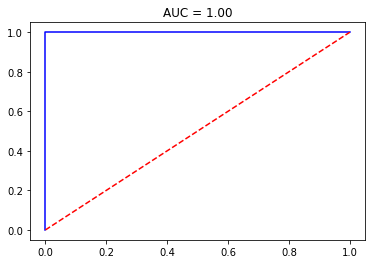

In [169]:
from sklearn.model_selection import cross_val_predict

cv_1 = cross_val_predict(LogisticRegression(),
                         model_1,
                         diagnostic[target_1],
                         cv = 10)

metricas_modelos(diagnostic[target_1], cv_1);

La matriz de confusión es 
[[70  0]
 [ 0 50]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


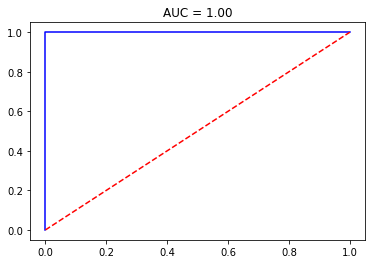

In [172]:
cv_2 = cross_val_predict(LogisticRegression(),
                         model_2,
                         diagnostic[target_2],
                         cv = 10)

metricas_modelos(diagnostic[target_2], cv_2)

Al realizar modelos mediante validación cruzada se puede observar que los resultados son óptimos para ambas variables objetivo.

### Metodología alternativa para  el Análisis de relevancia de atributos en Python - IV y WoE  
Referencia:https://towardsdatascience.com/attribute-relevance-analysis-in-python-iv-and-woe-b5651443fc04

In [127]:
#Alternativa cálculo conjunto WoE y IV
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [132]:
diagnostic

,a1,a2,a3,a4,a5,a6,d2,d1,a1_g1,a1_g1_b,a1_g2,a1_g2_b
0,35.5,0,1,0,0,0,0,0,n0,n0,n0,n0
1,35.9,0,0,1,1,1,0,1,n0,n0,n0,n0
2,35.9,0,1,0,0,0,0,0,n0,n0,n0,n0
3,36.0,0,0,1,1,1,0,1,n0,n0,n0,n0
4,36.0,0,1,0,0,0,0,0,n0,n0,n0,n0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,1,0,n3,n3,n2,n1
116,41.5,0,0,0,0,0,0,0,n3,n3,n2,n1
117,41.5,1,1,0,1,0,1,0,n3,n3,n2,n1
118,41.5,0,1,1,0,1,1,0,n3,n3,n2,n1


In [134]:
for col in diagnostic.columns:
    if col == 'target_1': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(diagnostic, col, target_1) #df, iv = calculate_woe_iv(diagnostic, col, 'target_1')
        print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: a1
    Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
9    37.0    8     1    7    0.016393   0.118644 -1.979247  0.202379
18   37.9    5     1    4    0.016393   0.067797 -1.419631  0.072974
16   37.7    4     1    3    0.016393   0.050847 -1.131949  0.039000
11   37.2    3     1    2    0.016393   0.033898 -0.726484  0.012717
14   37.5    6     2    4    0.032787   0.067797 -0.726484  0.025434
12   37.3    3     1    2    0.016393   0.033898 -0.726484  0.012717
10   37.1    3     1    2    0.016393   0.033898 -0.726484  0.012717
17   37.8    3     1    2    0.016393   0.033898 -0.726484  0.012717
37   40.9    3     1    2    0.016393   0.033898 -0.726484  0.012717
32   40.4    5     2    3    0.032787   0.050847 -0.438802  0.007925
5    36.6    4     2    2    0.032787   0.033898 -0.033336  0.000037
3    36.2    2     1    1    0.016393   0.016949 -0.033336  0.000019
13   37.4    2     1    1    0.016393   0.016949 -0.033336  0.000019
1    35.

In [135]:
for col in diagnostic.columns:
    if col == 'target_2': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(diagnostic, col, target_2)
        print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: a1
    Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
32   40.4    5     1    4    0.014286       0.08 -1.722767  0.113210
35   40.7    5     1    4    0.014286       0.08 -1.722767  0.113210
39   41.1    5     1    4    0.014286       0.08 -1.722767  0.113210
28   40.0    8     2    6    0.028571       0.12 -1.435085  0.131208
43   41.5    4     1    3    0.014286       0.06 -1.435085  0.065604
40   41.2    4     1    3    0.014286       0.06 -1.435085  0.065604
38   41.0    4     1    3    0.014286       0.06 -1.435085  0.065604
34   40.6    3     1    2    0.014286       0.04 -1.029619  0.026476
30   40.2    3     1    2    0.014286       0.04 -1.029619  0.026476
37   40.9    3     0    3    0.000000       0.06  0.000000 -0.000000
36   40.8    1     0    1    0.000000       0.02  0.000000 -0.000000
33   40.5    1     0    1    0.000000       0.02  0.000000 -0.000000
23   38.7    1     0    1    0.000000       0.02  0.000000 -0.000000
31   40.

Para interpregtar los resultados de IV, podemos fijarnos en esta tabla:  
![Interpretar el valor de IV](images/IV_Interpretation.png)

Por tanto seleccionaríamos:   
Para la traget_1:

- a2 (0.14)
- a4 (0.70)
- a6 (0.09)
- a1_g1 (0.54)
- a1_g1_b (0.58)
- a1_g2 (0.19)
- a1_g2_b (0.23)  

Para la target_2:  

- a2 (0.50)
- a3 (0.89)
- a4 (0.25)
- a5 (0.05)
- a6 (0.42)